## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('german_credit.csv')

In [3]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

Ответ: пропусков в данных нет

In [5]:
# создадим списки фичей по категориям

categorical_features = ['credit_history', 'purpose', 'installment_rate', 'personal_status_sex', 'other_debtors', 
                        'present_residence', 'other_installment_plans', 'property', 'housing', 'job']
binary_features = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
ordinal_features = ['status', 'savings', 'employment_duration', 'number_credits']
num_features = ['duration', 'amount', 'age']

Проверим каких типов есть колонки

In [6]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

Сначала проверим колонки типа int

In [7]:
data.select_dtypes('int64').head()

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


Как мы видим признаки явно не бинарные, отнесем их к num_features

Далее проверим признаки типа object

In [8]:
data.select_dtypes('object').columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')

In [9]:
data.status.value_counts()

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

Отнесем данную фичу к типу ordinal, так как обычно клиент со стабильно высоким доходом будет лучше для банка

In [10]:
data.credit_history.value_counts()

no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64

Отнесем данную фиу к типу категориальных, так как сложно здесь отделять какие категории хуже, а какие лучше

In [11]:
data.purpose.value_counts()

furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                 9
Name: purpose, dtype: int64

Стандартная категориальная фича

In [12]:
data.savings.value_counts()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64

Ординальная фича, так как наличие сбережений, лучше их отсутствия

In [13]:
data.employment_duration.value_counts()

1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... < 7 yrs    174
< 1 yr              172
unemployed           62
Name: employment_duration, dtype: int64

Отнесу данную фичу к порядковой, исходя из гипотезы, что человек имеющий стабильное трудоустройство скорее выплатит кредит, так как имеет стабильный доход

In [14]:
data.installment_rate.value_counts()

< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64

Так как я не очень понял, что за фича, отнесу ее к категориальной

In [15]:
data.personal_status_sex.value_counts()

male : married/widowed                  548
female : non-single or male : single    310
female : single                          92
male : divorced/separated                50
Name: personal_status_sex, dtype: int64

Категориальная фича

In [16]:
data.other_debtors.value_counts()

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

Категориальная фича

In [17]:
data.present_residence.value_counts()

>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64

Буду считать, что это категориальная фича, так не думаю, что здесь есть линейная зависимость

In [18]:
data.property.value_counts()

building soc. savings agr./life insurance    332
unknown / no property                        282
car or other                                 232
real estate                                  154
Name: property, dtype: int64

Категориальная фича

In [19]:
data.other_installment_plans.value_counts()

none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64

Категориальная фича

In [20]:
data.housing.value_counts()

rent        714
for free    179
own         107
Name: housing, dtype: int64

Категориальная фича

In [21]:
data.number_credits.value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

Мне кажется, что это порядковая фича, так как, чем больше у человека кредитов, тем менее он надежен

In [22]:
data.job.value_counts()

skilled employee/official                     630
unskilled - resident                          200
manager/self-empl./highly qualif. employee    148
unemployed/unskilled - non-resident            22
Name: job, dtype: int64

Категориальная фича

In [23]:
data.people_liable.value_counts()

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64

Будем считать это бинарной фичей, так как всего два значения

In [24]:
data.telephone.value_counts()

no                           596
yes (under customer name)    404
Name: telephone, dtype: int64

Бинарная по той же причине

In [25]:
data.foreign_worker.value_counts()

no     963
yes     37
Name: foreign_worker, dtype: int64

Опять бинарная

In [26]:
data.credit_risk.value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

Думаю это наш таргет, но по сути столбец бинарный

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [27]:
data.groupby('purpose').amount.mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

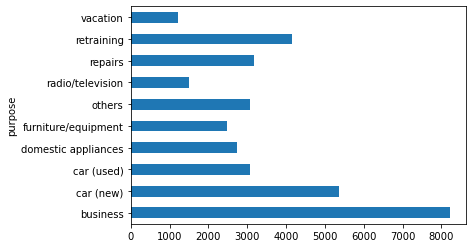

In [28]:
data.groupby('purpose').amount.mean().plot.barh()

Для бизнес целей кридиты самые большие, ну как и ожидалось. А так, фича видимо неплохая

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [29]:
data[data.age < 30].groupby('housing').count().status / data[data.age < 30].shape[0]

housing
for free    0.306233
own         0.027100
rent        0.666667
Name: status, dtype: float64

Видим, что 66% снимает жилье, дополнительная статья расходов

In [30]:
data[data.age > 40].groupby('housing').count().status / data[data.age > 40].shape[0]

housing
for free    0.102941
own         0.216912
rent        0.680147
Name: status, dtype: float64

Шок, даже больше, аж 68%. Но справедливости ради, неплохое количество все таки обзавелось жильем

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [31]:
data[data.foreign_worker == 'yes'].number_credits.value_counts()

1      25
2-3    11
4-5     1
Name: number_credits, dtype: int64

Всего у одного, как видим

### Задание 6 (1 балл)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

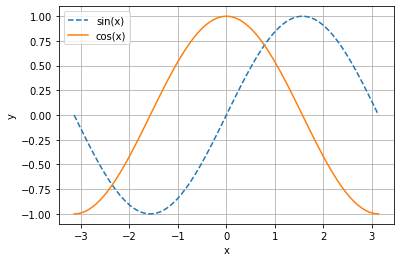

In [33]:
x = np.linspace(-np.pi, np.pi, num=100)
x_sin = np.sin(x)
x_cos = np.cos(x)

plt.plot(x, x_sin, '--', label='sin(x)')
plt.plot(x, x_cos, label='cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 0.98, 'Status of checking account')

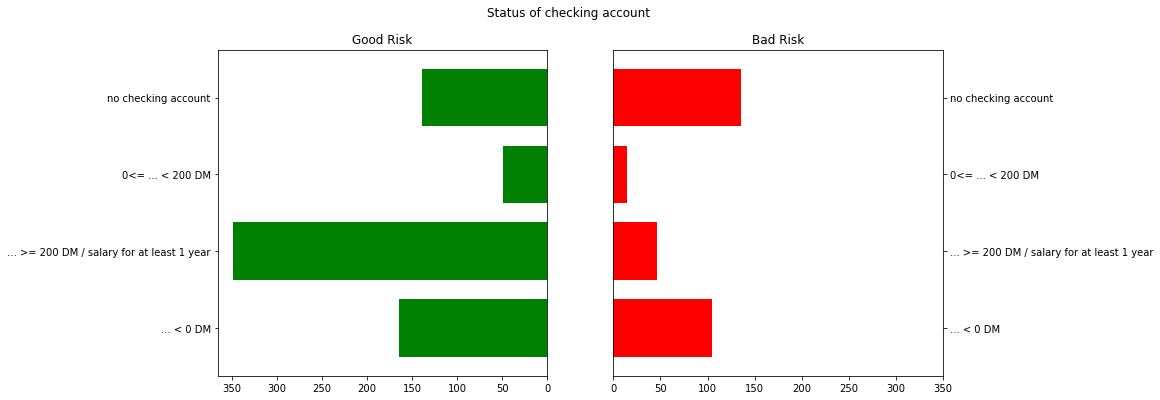

In [34]:
figure, axes = plt.subplots(1, 2)
figure.set_figheight(6)
figure.set_figwidth(13)


data[data.credit_risk == 'good'].groupby('status').count().amount.plot.barh(ax=axes[0], color='g', width=0.75)
data[data.credit_risk == 'bad'].groupby('status').count().amount.plot.barh(ax=axes[1], color='r', width=0.75)

axes[0].set(ylabel=None)
axes[0].invert_xaxis()
axes[0].set_title('Good Risk')
axes[0].set_xticks(np.arange(0, 400, 50))

axes[1].yaxis.tick_right()
axes[1].set_title('Bad Risk')
axes[1].set(ylabel=None)
axes[1].set_xticks(np.arange(0, 400, 50))

figure.suptitle('Status of checking account')

### Задание 8  (0.5 балла)

In [35]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

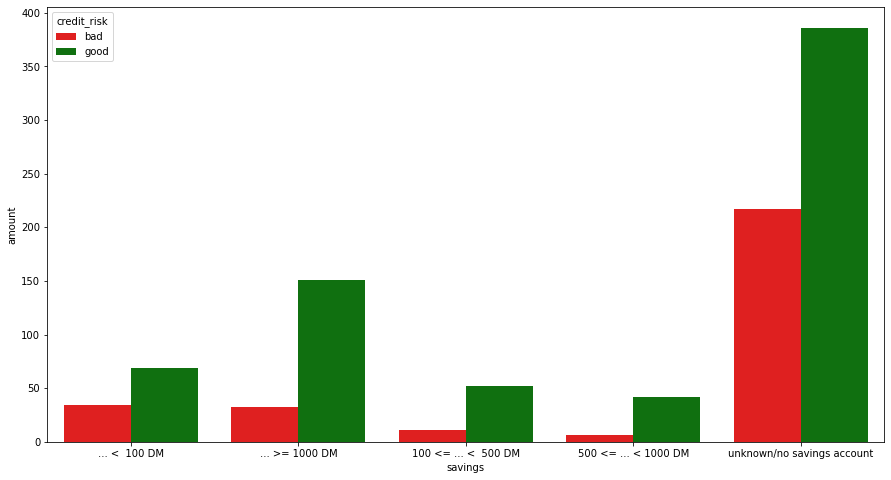

In [36]:
grouped = data.groupby(['credit_risk', 'savings'], as_index=False).amount.count()

plt.figure(figsize=(15, 8))
palette ={"good": "g", "bad": "r"}
sns.barplot(x='savings', y='amount', hue='credit_risk', data=grouped, palette=palette)

Используя sns получается полегче, надо писать меньше кода

А по графикам можно заключить, что если у человека нет сбережений, то вероятность невыплаты повышается

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

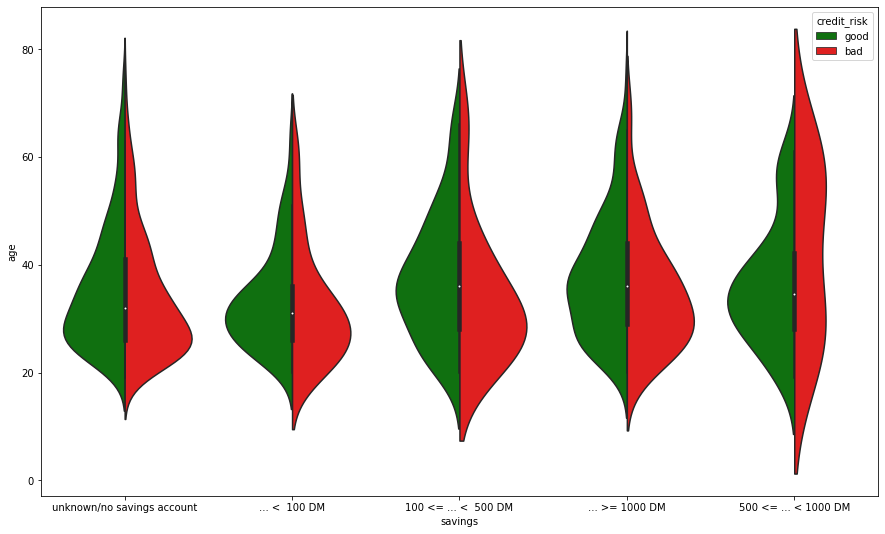

In [37]:
plt.figure(figsize=(15, 9))
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', palette=palette, split=True)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

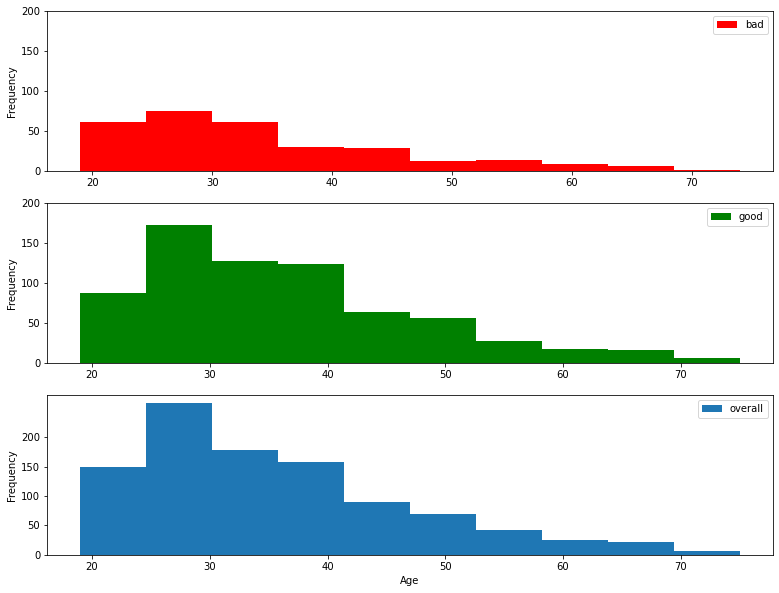

In [38]:
grouped = data.groupby('credit_risk')
fig, axs = plt.subplots(3, 1)
fig.set_figheight(10)
fig.set_figwidth(13)
i = 0
colors = ['r', 'g']
for name, group in grouped:
    group.age.plot(kind='hist', ax=axs[i], label=name, color=colors[i])
    axs[i].set_yticks(np.arange(0, 250, 50))
    axs[i].set_xticks(np.arange(20, 80, 10))
    axs[i].legend()
    i+=1
data.age.plot(kind='hist', ax=axs[2], label='overall')
axs[2].set_yticks(np.arange(0, 250, 50))
axs[2].set_xticks(np.arange(20, 80, 10))
axs[2].set(xlabel='Age')
plt.legend()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

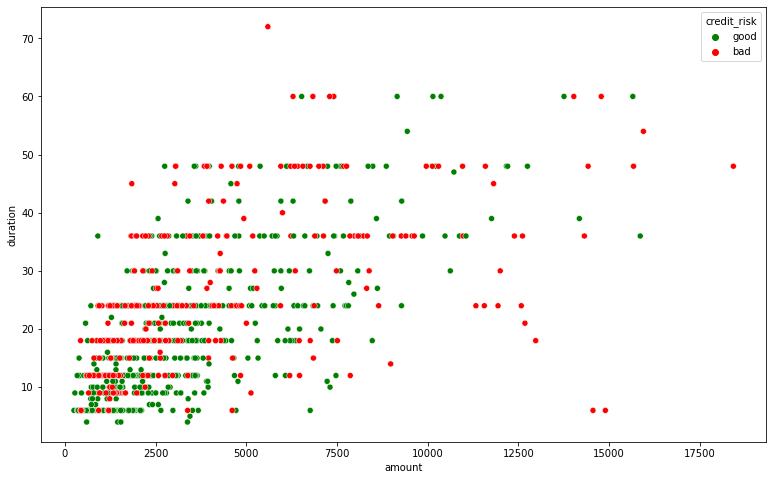

In [39]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=palette)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [40]:
from mpl_toolkits.mplot3d import Axes3D

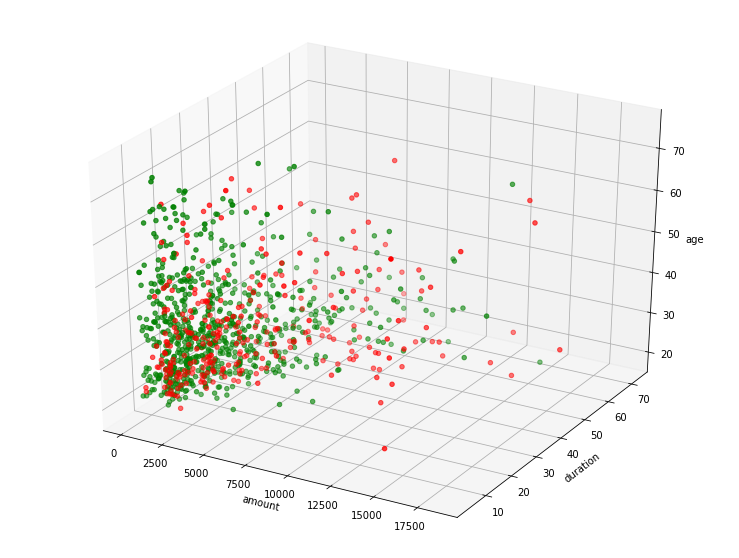

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

fig.set_figheight(10)
fig.set_figwidth(13)

x = data['amount']
y = data['duration']
z = data['age']

ax.set_xlabel("amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")

ax.scatter(x, y, z, c=data['credit_risk'].apply(lambda x: 'g' if x == 'good' else 'r'))

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [42]:
data_prepared = pd.get_dummies(data, columns=binary_features + ordinal_features, drop_first=True).drop(categorical_features, axis=1)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [100]:
def metric(X, y):
    return np.sqrt(np.sum((X - y) ** 2, axis=1))

def predict(Xtrain: np.array, ytrain, Xtest: np.array, k) -> np.array:
    nearest_neighbours = list()
    for vec in Xtest:
        nearest_neighbours.append((metric(Xtrain, vec)).argsort()[:k])
    
    prediction = list()
    for idx in nearest_neighbours:
        prediction.append(np.bincount(ytrain[idx]).argmax())
        
    return np.array(prediction).reshape(-1, 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_prepared.drop('credit_risk_good', 1).values
y = data_prepared['credit_risk_good'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# first prediction
accuracy_score(y_test, predict(X_train, y_train, X_test, 5))

<ipython-input-100-aae267fab4e3>:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_prepared.drop('credit_risk_good', 1).values


0.632

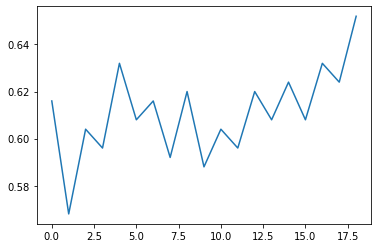

In [44]:
# choose best k

k = list()
for i in range(1, 20):
    k.append(accuracy_score(y_test, predict(X_train, y_train, X_test, i)))

plt.plot(np.array(k))

Возьму k = 5, решение выглядит довольно неплохо. Посмотрим можно ли улучшить результат. Для этого сначала отнормируем 3 первых числовых столбца, так как масштабы слишком разные, по сравнению с остальными признаками

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train[:, :3] = scaler.fit_transform(X_train[:, :3])
X_test[:, :3] = scaler.transform(X_test[:, :3])

Посмотрим изменился ли результат

In [46]:
# second prediction
accuracy_score(y_test, predict(X_train, y_train, X_test, 5))

0.72

Он стал лучше, неплохо

In [184]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

np.random.seed(15)

X = data_prepared.drop('credit_risk_good', axis=1).values
y = data_prepared['credit_risk_good'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train[:, :3] = scaler.fit_transform(X_train[:, :3])
X_test[:, :3] = scaler.transform(X_test[:, :3])

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_train = poly.fit_transform(X_train, y_train)
X_test = poly.transform(X_test)

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train, y_train)

f_select = SelectFromModel(clf, prefit=True)
X_train = f_select.transform(X_train)
X_test = f_select.transform(X_test)

model = LogisticRegression()
# model = KNeighborsClassifier(weights='distance', p=1)

model.fit(X_train, y_train)
prediction = model.predict(X_test)

accuracy_score(y_test, prediction)

0.73